# Introduction

Here, I explore how different unsupervised ML algorithms cluster datasets with different structures. 

To do so, I use three different datasets consisting of points in a two dimensional space. Each point has an associated class which will serve to evaluate the performance of each clustering algorithm. 

Each dataset contains 1000 data points, each of them belonging to one of either 2 or 4 clases.

Each clustering algorithm has its own nuances which make it better in certain cases and worse in others. Along with the execution of the algorithms I will explain these nuances and how they affect the performance of the algorithm.

There is a "environment.yaml" file with the required packages and versions in this repository.

This notebook derives from exercises performed in the Data Science MSc by UOC.

In [1]:
import random

import tqdm
import umap
import numpy as np
import pandas as pd

# Clustering-related
import sklearn
from sklearn import cluster        
from sklearn import datasets       
from sklearn import decomposition

# Visualization-related
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

## Generation of datasets

In [18]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=42)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=42)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=42)

list_vars = [X_blobs, y_blobs, X_moons, y_moons, X_circles, y_circles]
list_var_names = ["X_blobs", "y_blobs", "X_moons", "y_moons", "X_circles", "y_circles"]

for el in range(len(list_vars)):
    print("Dimensions of "+ list_var_names[el]+": "+ str(list_vars[el].shape))

for el in [1, 3, 5]:
    print("Number of unique elements in "+list_var_names[el][2:]+": "+str(len(np.unique(list_vars[el]))))

Dimensions of X_blobs: (1000, 2)
Dimensions of y_blobs: (1000,)
Dimensions of X_moons: (1000, 2)
Dimensions of y_moons: (1000,)
Dimensions of X_circles: (1000, 2)
Dimensions of y_circles: (1000,)
Number of unique elements in blobs: 4
Number of unique elements in moons: 2
Number of unique elements in circles: 2


We have 3 datasets ("Blobs", "Moons" and "Circles") each of them containing 1000 points. In the Blobs dataset we have 4 clases, whereas in the Moons and in the Circles dataset we have 2 clases.

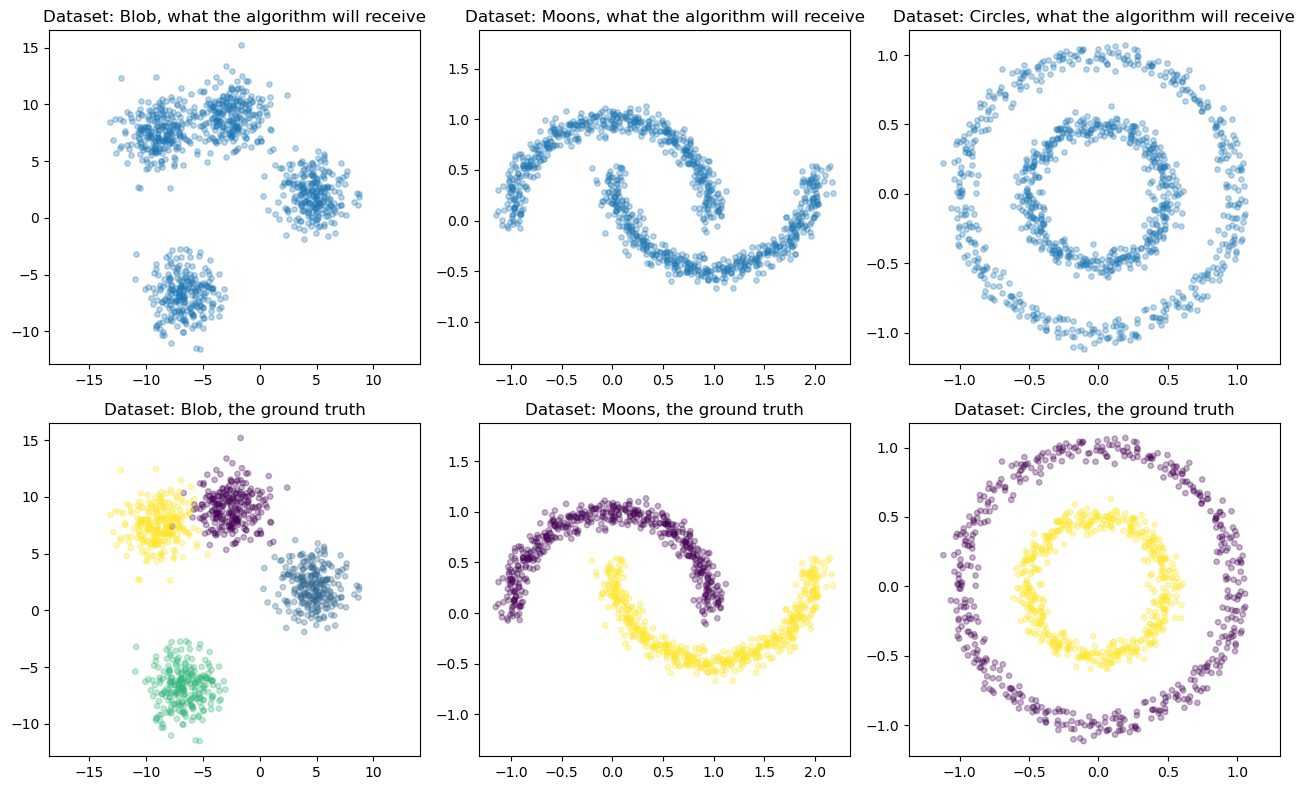

In [19]:
fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('what the algorithm will receive' if i < 3 else 'the ground truth'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.3)
    ax.axis('equal')
plt.tight_layout()